# Estimating signals on the n-sphere from noisy data

In [3]:
import sys
sys.path.append("../install/lib/python2.7/site-packages") 
import pyRestoreManifold as prm

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pyRestoreManifold.utils import MakeSignal as mss
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize']=[20,10]
plt.rcParams['image.cmap']='jet' #'viridis' before

## Generate a toy example on S5 and add noise

Text(0.5,1,u'Fourth observation')

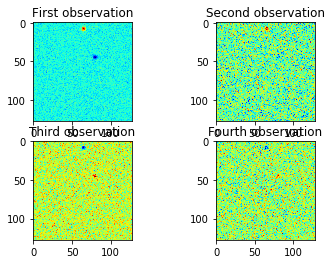

In [5]:
t=128
n=5
J=3
SNR = 40.

X,Ang,x0,v0=mss.Make_Sn(amp=5.,t=t,n=n,w=2)
Noise = np.random.randn(n,t,t)
Xn = X + np.power(10.,-SNR/20.)*np.linalg.norm(X)/np.linalg.norm(Noise)*Noise
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(Xn[0,:,:])
axarr[0, 0].set_title('First observation')
axarr[0, 1].imshow(Xn[1,:,:])
axarr[0, 1].set_title('Second observation')
axarr[1, 0].imshow(Xn[2,:,:])
axarr[1, 0].set_title('Third observation')
axarr[1, 1].imshow(Xn[3,:,:])
axarr[1, 1].set_title('Fourth observation')

    


## A naive restoration approach: thresholding individually each slice

Text(0.5,1,u'Fourth thresholded observation')

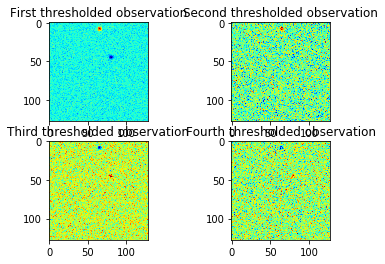

In [8]:
import pyStarlet.pyStarlet

J = 3 # Number of scales
kmad = 3. # k-mad thresholding is used
L0 = 1 # Performs hard rather than soft-thresholding

Xhat = pyStarlet.Filter(Xn,J=J,th=kmad,L0=L0)

f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(Xhat[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
axarr[0, 1].imshow(Xhat[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
axarr[1, 0].imshow(Xhat[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
axarr[1, 1].imshow(Xhat[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')




## A naive manifold restoration approach: thresholding in n-sphere starlet domain

Text(0.5,1,u'Fourth thresholded observation')

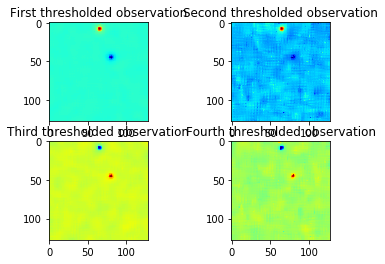

In [9]:
J = 3 # Number of scales
kmad = 3. # k-mad thresholding is used
L0 = 1 # Performs hard rather than soft-thresholding

Xhat = prm.restore.RestoreSn.Threshold_Sn(Xn,kmad=kmad,J=J,L0=L0)

f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(Xhat[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
axarr[0, 1].imshow(Xhat[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
axarr[1, 0].imshow(Xhat[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
axarr[1, 1].imshow(Xhat[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')


## Applying the FBS algorithm for denoising

In [10]:
Xout,f = prm.restore.RestoreSn.Denoise_FBS(Xn,nmax=100,kmad=1.5,tol=1e-6,gamma=0.5,J=3,verb=0,L0=False)

Text(0.5,1,u'Fourth thresholded observation')

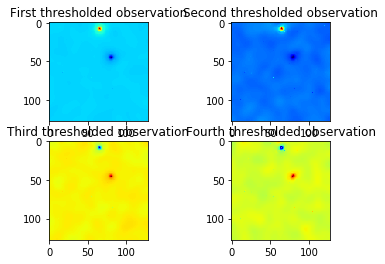

In [11]:
plt.figure(0)
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(Xout[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
axarr[0, 1].imshow(Xout[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
axarr[1, 0].imshow(Xout[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
axarr[1, 1].imshow(Xout[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')


## Applying the G-FBS algorithm for denoising

In [12]:
Xout,f = prm.restore.RestoreSn.Denoise_GFBS(Xn,nmax=100,kmad=1.5,tol=1e-6,gamma=0.5,J=3,verb=0,L0=False)

Text(0.5,1,u'Fourth thresholded observation')

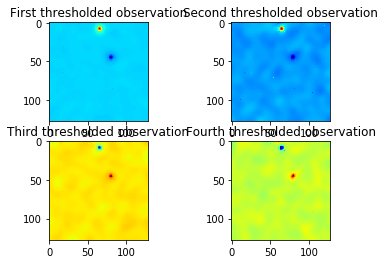

In [13]:
plt.figure(0)
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(Xout[0,:,:])
axarr[0, 0].set_title('First thresholded observation')
axarr[0, 1].imshow(Xout[1,:,:])
axarr[0, 1].set_title('Second thresholded observation')
axarr[1, 0].imshow(Xout[2,:,:])
axarr[1, 0].set_title('Third thresholded observation')
axarr[1, 1].imshow(Xout[3,:,:])
axarr[1, 1].set_title('Fourth thresholded observation')


## Evaluate the FBS algorithm for denoising

In [14]:
def Get_FBS(Xn,X,J=3,k=3,tol=1e-9,gamma=1):
    
    Xrec,f = prm.restore.RestoreSn.Denoise_FBS(Xn,Yin=None,nmax=1e4,kmad=k,tol=tol,gamma=gamma,J=J,verb=0)

    medS = np.median(prm.restore.RestoreSn.SAD(X,Xrec))
    maxS = np.max(prm.restore.RestoreSn.SAD(X,Xrec))
    meanS= np.mean(prm.restore.RestoreSn.SAD(X,Xrec))
    MSE = np.linalg.norm(Xrec-X)/np.linalg.norm(X)
    
    return medS,maxS,meanS,MSE,f

def Get_GFBS(Xn,X,J=3,k=3,tol=1e-9,gamma=1):
    
    Xrec,f = prm.restore.RestoreSn.Denoise_GFBS(Xn,Yin=None,nmax=1e4,kmad=k,tol=tol,gamma=gamma,J=J,verb=0)

    medS = np.median(prm.restore.RestoreSn.SAD(X,Xrec))
    maxS = np.max(prm.restore.RestoreSn.SAD(X,Xrec))
    meanS= np.mean(prm.restore.RestoreSn.SAD(X,Xrec))
    MSE = np.linalg.norm(Xrec-X)/np.linalg.norm(X)
    
    return medS,maxS,meanS,MSE,f

In [ ]:
vg = [0.1,0.5,1.] # Test for different gradient path lengths
vk = [0.,0.1,0.5,1.,1.5,2,2.5,3,3.,4,5] # Values of the k-mad that we test
mSf = []
mseSf = []
mSg = []
mseSg = []

for g in vg:
    for k in vk:
        medS,maxS,meanS,MSE,f = Get_FBS(Xn,X,J=3,k=k,tol=1e-9,gamma=g)
        mSf.append(medS)
        mseSf.append(MSE)
        medS,maxS,meanS,MSE,f = Get_GFBS(Xn,X,J=3,k=k,tol=1e-9,gamma=g)
        mSg.append(medS)
        mseSg.append(MSE)


In [ ]:
plt.subplot(121)
Ms = np.reshape(mSf,(3,-1))
plt.loglog(vk,Ms.T,'8',markersize=10,alpha=0.5)
plt.legend(vg)
plt.xlabel("Value of k-mad")
plt.ylabel("Mean angular error")
plt.subplot(122)
Mse = np.reshape(mseSf,(3,-1))
plt.semilogx(vk,-20*np.log10(Mse.T),'8',markersize=10,alpha=0.5)
plt.xlabel("Value of k-mad")
plt.ylabel("PSNR")
plt.legend(vg)